# Written by Federica B. Bianco @fedhere
# for UDel FDSfE 2022


Citibikes is the shared bike services for NYC and they historically have done a great job at making their data public (while respecting people's privacy of course! well... almost always... https://www.wsj.com/articles/SB10001424127887323829104578624263439561672)

-  The "idea" is that citi bikes, which are farily bulky bikes, may be designed in such a way that they are more comfortable for larger people, and therefore, on average, for men.  

-  If the bikes are uncomfortable, the users will not use them for long trips. So to test that you can measure the trip duration for customers that are registered as male and customers that are registered as female and see (1) if they  have the same mean, and (2) if they are "the same" distribution (more precisely you will meausre if they come from the "same parent distribution").

-  Choose the significance threshold

-  Wrangle the data so that it is ready for your analysis.

-  Explore the data statistical properties (mean, standard deviation...)

-  Clearly state they Null and Alternate hypothesis for the first question

-  Answer the first question with a t-test

-  Clearly state they Null and Alternate hypothesis for the second question

-  Answer the second question with a ks_2sample test


-  Extra Credit: split the sample in week-days and weekends and redo the analysis for the week-days and weekend cases separately

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# IDEA:
 Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

Remember:
### NULL HYPOTHESIS _H0_:
You want to falsify it so make it the opposite of your idea


### ALTERNATIVE HYPOTHESIS _HA_:
This shoudl be the complement of the NULL, including everything that the NULL does not




IDEA:
Citibike usage would be different by gender if the bikes are more comfortable fofr people who are taller and with larger frames.

NULL HYPOTHESIS *HO*:
Citibike usage would be the same for genders identifng as male and female.

ALTERNATIVE HYPOTHESIS *HA*:
Citibike usage would be different for females (it will be shorter) than it would be for males.

In [ ]:
pvalue = 0.05

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame".

In [ ]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration

you know what to do!

In [ ]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
cbMay19.shape

(1924563, 15)

In [ ]:
cbMay19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924563 entries, 0 to 1924562
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 220.2+ MB


In [ ]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


In [ ]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [ ]:
cbMay19.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0
1924562,964,2019-05-31 23:59:55.5500,2019-06-01 00:15:59.8680,285,Broadway & E 14 St,40.734546,-73.990741,3656,E 2 St & Avenue A,40.723077,-73.985836,32565,Subscriber,1992,2


You hsould have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

Because your variable of interest is "tripduration" explore this variable in some more detail.

In [ ]:
cbMay19["tripduration"]

0           139
1           754
2          2308
3           143
4           138
           ... 
1924558     304
1924559     324
1924560    1926
1924561    2047
1924562     964
Name: tripduration, Length: 1924563, dtype: int64

In [ ]:
cbMay19["tripduration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1924563 entries, 0 to 1924562
Series name: tripduration
Non-Null Count    Dtype
--------------    -----
1924563 non-null  int64
dtypes: int64(1)
memory usage: 14.7 MB


In [ ]:
cbMay19["tripduration"].describe()

count    1.924563e+06
mean     1.067189e+03
std      1.254636e+04
min      6.100000e+01
25%      3.790000e+02
50%      6.530000e+02
75%      1.158000e+03
max      2.922656e+06
Name: tripduration, dtype: float64

In [ ]:
cbMay19[cbMay19["tripduration"] == cbMay19["tripduration"].max()]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
236265,2922656,2019-05-04 18:51:33.9090,2019-06-07 14:42:30.0940,3453,Devoe St & Lorimer St,40.713352,-73.949103,3074,Montrose Ave & Bushwick Ave,40.707678,-73.940162,16804,Customer,1969,0


## Plot the trip duration distribution

hint: when I say plot the distribution generally that means make a histogram


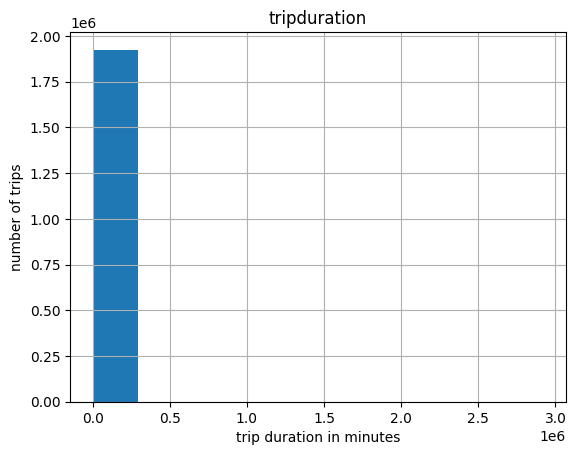

In [ ]:
# your code here
plt.hist(cbMay19["tripduration"])
plt.title("tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.grid();

Figure 1:. This histogram graphs the number of trips taken by the trip duration in minutes. It is highly skewed to the right and shows us minutes between 0-0,3 have the greatest number of trips.

there are some really large numbers... trips that last >1000000 minutes...  clearly this is a data curation issue.

You need to clean the data by removin all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


You can do it by setting the condition

```cbMay19["tripduration"] < ...```

and using this condition as an index

```cbMay19_clean = cbMay19[cbMay19["tripduration"]....```

Remake the histogram, now the sahape of the tripduration distribution should be much clearer

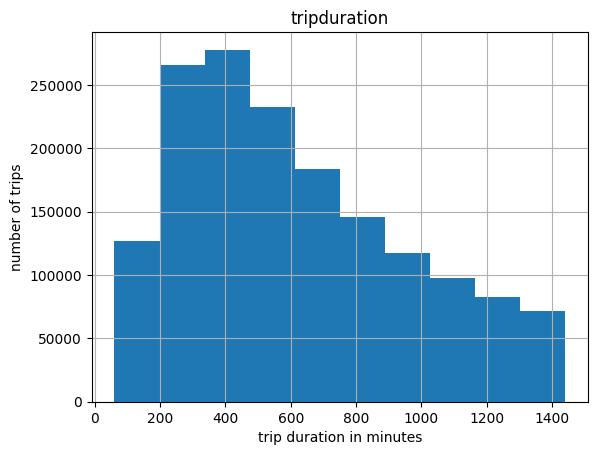

In [ ]:
# your code here
cbMay19_clean = cbMay19[cbMay19["tripduration"]<=1440]
cbMay19_clean.hist(column = "tripduration");
plt.xlabel("trip duration in minutes");
plt.ylabel("number of trips");

Figure 2: As seen above, this histogram is clearer and shows more information. It is skewed to the right. This graph shows the trip durations less than a day.

# Data Wrangling

Split the data into two dataframes by gender
save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes. Again you can do it by setting a condition on the column ```["gender"]```

In [ ]:
male_gender = cbMay19_clean[cbMay19_clean["gender"]==1]
male_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
7,524,2019-05-01 00:01:21.0070,2019-05-01 00:10:05.9440,380,W 4 St & 7 Ave S,40.734011,-74.002939,439,E 4 St & 2 Ave,40.726281,-73.989780,16742,Subscriber,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924548,187,2019-05-31 23:59:21.1690,2019-06-01 00:02:28.7060,3496,1 Ave & E 110 St,40.792327,-73.938300,3502,Lexington Ave & E 111 St,40.795412,-73.944123,26794,Subscriber,1992,1
1924549,345,2019-05-31 23:59:22.6070,2019-06-01 00:05:08.5390,3298,Warren St & Court St,40.686371,-73.993833,3377,Carroll St & Bond St,40.678612,-73.990373,33433,Subscriber,1993,1
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1


In [ ]:
female_gender = cbMay19_clean[cbMay19_clean["gender"]==2]
female_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
30,355,2019-05-01 00:03:23.7070,2019-05-01 00:09:18.8550,325,E 19 St & 3 Ave,40.736245,-73.984738,438,St Marks Pl & 1 Ave,40.727791,-73.985649,25468,Subscriber,1990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


## plot the trip duration distributions for gender=2 and gender=1



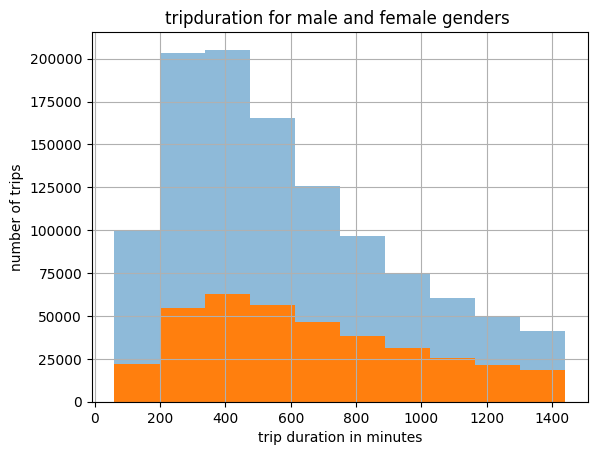

In [ ]:
# your code here
plt.hist(male_gender['tripduration'], alpha=0.5, label = 'male')
plt.hist(female_gender['tripduration'], label = 'female')
plt.title("tripduration for male and female genders ")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.grid()

Figure 3: This histogram shows the trip durations of male and female identifying genders. Both graphs are skewed to the right, with more trips between 200-780 minutes. The males is the blue graph while the orange is the female graph. The graph for those that identify as males is longer, which indicates they took more trips between the minutes of 200-600.

Notice how the histograms are differnt hights: one of the two categories has a lot more trips than the other one. Figure out which and discuss it in the caption

# Statistical analysis
Run two statistical tests: the t-test and the KS-test.


# Check if the mean of the samples is the same

Your Null hypothesis _H0_ and Alternative hypotehsis _HA_ are respectively:

H0: µ1 = µ2 (the two sample means are equal)

HA: µ1 ≠µ2 (the two sample means are not equal)

First look at the data summary statistics: are the means the same number? are the means contained within each other's standard deviations --- i.e. is

_mean1 > mean2 - std2 and mean1 < mean2 + std2_

or

_mean2 > mean1 - std1 and mean2 < mean1 + std1_

this will set some expextation.





In [ ]:
male_gender["tripduration"].mean()

588.4166944539049

In [ ]:
female_gender["tripduration"].mean()

652.4541506624231

In [ ]:
male_gender["tripduration"].std()

335.25493400230937

In [ ]:
female_gender["tripduration"].std()

342.2888618686749

The mean for the trip duration for male and female are not the same though the standard deviation are closer in number. The means are also contained within each other's standard deviations.



To answer the question more formally  test you can use the t-test. You can use the ```ttest_ind`` function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [ ]:
# get the usage information for the function here or on the webpage of the function
stats.ttest_ind

In [ ]:
# your code here
tstats, pvalue = stats.ttest_ind(male_gender['tripduration'], female_gender['tripduration'])
tstats, pvalue

(-100.89842165582859, 0.0)

interpret the result based on your chosen confidence threshold and on the results of the ```ttest_ind`` function.



The chosen interval is 95% and the pvalue is less than 0.05. This indicates good evidence to reject the null hypothesis that the mean of the trip duration for male and female are the same, they are not. The difference between both means as we saw above is significant.


# Are the sample coming from the same parent distribution

The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





Write the NULL and Alternative hypothesis here:

NULL hypothesis: The samples are not from the same parent distribution.
Alternative hypothesis: The samples are from the same parent distribution

Run the test ```stats.ks_2samp```

In [ ]:
# your code here
stats.ks_2samp(male_gender['tripduration'], female_gender['tripduration'])

KstestResult(statistic=0.08424655017926841, pvalue=0.0, statistic_location=525, statistic_sign=1)

the k test before normalizing the data gave a pvalue of 0 which means the null hypothesis would be rejected.

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

In [ ]:
normed_f = (female_gender["tripduration"] - female_gender["tripduration"].mean()) / female_gender["tripduration"].std()
normed_m = (male_gender["tripduration"] - male_gender["tripduration"].mean()) / male_gender["tripduration"].std()

In [ ]:
normed_f

10        -1.216675
12        -0.340222
20        -1.058913
22        -0.290556
30        -0.869015
             ...   
1924554    0.135984
1924556   -0.644059
1924558   -1.018012
1924559   -0.959582
1924562    0.910184
Name: tripduration, Length: 376723, dtype: float64

In [ ]:
normed_m

0         -1.340522
3         -1.328591
4         -1.343505
6         -0.221970
7         -0.192142
             ...   
1924548   -1.197348
1924549   -0.726064
1924551   -1.060139
1924553    0.702699
1924555   -0.466560
Name: tripduration, Length: 1121618, dtype: float64

rerun the test after normalizing, did the conclusion change?

In [ ]:
# your code here
stats.ks_2samp(normed_m, normed_f)

KstestResult(statistic=0.02278907853735008, pvalue=1.1717953531092037e-127, statistic_location=-1.283869268381357, statistic_sign=-1)

after re-running the k test with the normalized data, I got a pvalue with the power to -127, which is an extremely small number, closer to zero. This indicates a strong evidence against the null hypothesis that the two datasets are from the same distribution.

# Extra Credit : do the same for week days only and weekends only

Pandas uses an excellent package to process dates! the datetime package

The current date columns are starttime and stoptime. You can convert starttime, which is currently a column containing simple strings, to a python datetime variable as follows



In [ ]:
cbMay19["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
2          2019-05-01 00:00:04.6270
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
                     ...           
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924560    2019-05-31 23:59:51.5060
1924561    2019-05-31 23:59:52.4170
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1924563, dtype: object

In [ ]:
cbMay19["tripdate"] = pd.to_datetime(cbMay19.starttime)
cbMay19["tripdate"]

0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
2         2019-05-01 00:00:04.627
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
                    ...          
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924560   2019-05-31 23:59:51.506
1924561   2019-05-31 23:59:52.417
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1924563, dtype: datetime64[ns]

Once you have a datetime column for the start of the trip you can separate week days and weekends using the condition

```cbMay19["tripdate"].dt.weekday < 5```

for weekdays and

```cbMay19["tripdate"].dt.weekday >= 5```

for weekends.

With the dataset separate in weekend and weekdays you can ask the same kind of questions: is trip duration characteristically different on weekends than on week days, or, are the gender-based differences you found for the overall sample the same for weekdays and weekends?


In [ ]:
weekdays = cbMay19[cbMay19["tripdate"].dt.weekday<5]
weekdays

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1,2019-05-01 00:00:04.627
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1,2019-05-31 23:59:51.506
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0,2019-05-31 23:59:52.417


In [ ]:
weekdays["tripduration"]

0           139
1           754
2          2308
3           143
4           138
           ... 
1924558     304
1924559     324
1924560    1926
1924561    2047
1924562     964
Name: tripduration, Length: 1519349, dtype: int64

In [ ]:
weekends = cbMay19[cbMay19["tripdate"].dt.weekday>=5]
weekends

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
192003,426,2019-05-04 00:00:07.3100,2019-05-04 00:07:13.9450,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,3668,Leonard St & Nassau Ave,40.723957,-73.949844,17924,Subscriber,1980,1,2019-05-04 00:00:07.310
192004,778,2019-05-04 00:00:10.8690,2019-05-04 00:13:09.1860,3656,E 2 St & Avenue A,40.723077,-73.985836,2012,E 27 St & 1 Ave,40.739445,-73.976806,31269,Subscriber,1996,2,2019-05-04 00:00:10.869
192005,451,2019-05-04 00:00:15.6220,2019-05-04 00:07:47.0350,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3083,Bushwick Ave & Powers St,40.712477,-73.941000,29921,Subscriber,1993,2,2019-05-04 00:00:15.622
192006,196,2019-05-04 00:00:20.7160,2019-05-04 00:03:37.0950,328,Watts St & Greenwich St,40.724055,-74.009660,257,Lispenard St & Broadway,40.719392,-74.002472,24996,Subscriber,1968,1,2019-05-04 00:00:20.716
192007,370,2019-05-04 00:00:21.0860,2019-05-04 00:06:31.8570,2003,1 Ave & E 18 St,40.733812,-73.980544,445,E 10 St & Avenue A,40.727408,-73.981420,30508,Subscriber,1994,1,2019-05-04 00:00:21.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607614,596,2019-05-26 23:59:44.4710,2019-05-27 00:09:41.3350,529,W 42 St & 8 Ave,40.757570,-73.990985,456,E 53 St & Madison Ave,40.759711,-73.974023,31658,Subscriber,1981,1,2019-05-26 23:59:44.471
1607615,115,2019-05-26 23:59:47.0730,2019-05-27 00:01:42.6020,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,24936,Customer,1969,0,2019-05-26 23:59:47.073
1607616,577,2019-05-26 23:59:48.0450,2019-05-27 00:09:25.2180,3078,Broadway & Roebling St,40.709248,-73.960631,3092,Berry St & N 8 St,40.719009,-73.958525,16657,Customer,1969,0,2019-05-26 23:59:48.045
1607617,628,2019-05-26 23:59:52.3010,2019-05-27 00:10:20.9620,3142,1 Ave & E 62 St,40.761227,-73.960940,499,Broadway & W 60 St,40.769155,-73.981918,14790,Subscriber,1988,1,2019-05-26 23:59:52.301


In [ ]:
weekends["tripduration"]

192003     426
192004     778
192005     451
192006     196
192007     370
          ... 
1607614    596
1607615    115
1607616    577
1607617    628
1607618    740
Name: tripduration, Length: 405214, dtype: int64

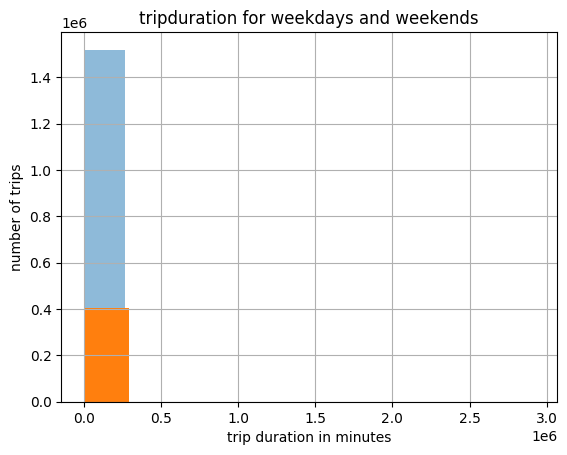

In [ ]:
plt.hist(weekdays["tripduration"], alpha=0.5)
plt.hist(weekends["tripduration"])
plt.title("tripduration for weekdays and weekends")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.grid()

This graph is the unclean version. It is highly skewed to the right and shows the trip duration on weekdays(blue) vs weekends(orange).

In [ ]:
weekdays["tripduration"].mean()

997.8067363061416

In [ ]:
weekends["tripduration"].mean()

1327.3382953204973

In [ ]:
weekdays["tripduration"].std()

11732.690924587994

In [ ]:
weekends["tripduration"].std()

15211.761726988416

In [ ]:
stats.ttest_ind(weekdays["tripduration"], weekends["tripduration"])

TtestResult(statistic=-14.856242632365019, pvalue=6.378763724430235e-50, df=1924561.0)

The pvalue got above is much smaller than the significance threshold. With this very small pvalue, it suggest strong evidence against the null hypothesis. The trip duration is different on weekdays and weekends.

TARA - Good work overall. You just needed to declare the null and alternative hypotheses for the extra credit portion of your notebook